## AutoML Binary Classification using Pycaret

#### Data import and basic EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iotdata.csv')

In [3]:
df.shape

(1000, 122)

In [4]:
df.head()

,X,Product_Qty_Unit,Product_ID,Production_Start_Time,Output_QualityParameter1,Material_ID,Product_Name,Output_QualityParameter2,Output_QualityParameter3,Output_QualityParameter4,...,Stage5_QP1_Actual,Stage5_QP1_High,Stage5_QP2_Low,Stage5_QP2_Actual,Stage5_QP2_High,Stage5_QP3_Low,Stage5_QP3_Actual,Stage5_QP3_High,Stage5_ResourceName,Detergent_Quality
0,1,KG,Product_0407,40656,380.000000,1234,Tide Plus Oxi,15625.00000,39000.0000,7550.0000,...,224.0000,230.0000,0,4.5000,18.0000,0,0.00000,0,Resource_108,Good
1,2,KG,Product_0407,201026,391.082110,1234,Tide Plus Oxi,14202.98200,36257.6125,7151.5015,...,231.3225,231.3225,0,18.1476,18.1476,0,0.00000,0,Resource_108,Good
2,3,KG,Product_0407,81616,386.162120,1234,Tide Plus Oxi,16356.86700,39566.6110,8368.5133,...,232.6450,232.6450,0,70.1316,18.2952,0,2.17962,0,Resource_108,Good
3,4,KG,Product_0407,202857,392.747275,1234,Tide Plus Oxi,12883.11125,36072.7115,7164.5108,...,223.7950,233.9675,0,4.6107,18.4428,0,0.00000,0,Resource_108,Good
4,5,KG,Product_0407,81630,386.824660,1234,Tide Plus Oxi,12485.47900,34779.1900,8256.9300,...,231.1980,235.2900,0,4.6476,18.5904,0,0.00000,0,Resource_108,Good


In [5]:
df['Detergent_Quality'].describe()

count     1000
unique       2
top       Good
freq       775
Name: Detergent_Quality, dtype: object

##### Splitting the dataset into 90-10 train-test split

In [25]:
traindata = df.sample(frac=0.90, random_state=424)
testdata = df.drop(traindata.index)
traindata.reset_index(inplace=True, drop=True)
testdata.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(traindata.shape))
print('Unseen Data For Predictions: ' + str(testdata.shape))

Data for Modeling: (900, 122)
Unseen Data For Predictions: (100, 122)


In [7]:
# Import Classification modules from pycaret
from pycaret.classification import *

In [8]:
target = 'Detergent_Quality'
data = traindata

##### Pycaret AutoML pipeline involves five steps : setup(), compare_models(), tune_model(), finalize_model(), predict_model()

##### setup() - Inference and Preprocessing

In [11]:
exp_clf = setup(data=data, target = target,fix_imbalance=True, feature_selection=True, session_id=160)

,Description,Value
0,session_id,160
1,Target,Detergent_Quality
2,Target Type,Binary
3,Label Encoded,"Bad: 0, Good: 1"
4,Original Data,"(900, 122)"
5,Missing Values,True
6,Numeric Features,86
7,Categorical Features,31
8,Ordinal Features,False
9,High Cardinality Features,False


##### compare_models() - Model Selection

In [12]:
# Determine the best model among different models based on metrics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9889,0.9942,0.9938,0.9918,0.9928,0.9689,0.9693,0.5920
ada,Ada Boost Classifier,0.9873,0.9939,0.9938,0.9898,0.9917,0.9644,0.9648,0.1900
lightgbm,Light Gradient Boosting Machine,0.9857,0.9974,0.9896,0.9917,0.9906,0.9611,0.9617,0.3000
dt,Decision Tree Classifier,0.9841,0.9780,0.9897,0.9898,0.9896,0.9558,0.9568,0.0470
rf,Random Forest Classifier,0.9507,0.9878,0.9815,0.9560,0.9683,0.8574,0.8613,0.3890
et,Extra Trees Classifier,0.8618,0.9347,0.9006,0.9180,0.9089,0.6218,0.6242,0.3330
qda,Quadratic Discriminant Analysis,0.7918,0.5647,0.9876,0.7927,0.8793,0.1759,0.2657,0.0760
ridge,Ridge Classifier,0.7791,0.0000,0.7867,0.9140,0.8447,0.4667,0.4848,0.0490
lda,Linear Discriminant Analysis,0.7759,0.8088,0.7929,0.9034,0.8435,0.4524,0.4660,0.0740
nb,Naive Bayes,0.7647,0.8745,0.7204,0.9650,0.8242,0.4887,0.5402,0.0390


In [13]:
#Print the parameters of the best model 
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=160, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


##### tune_model() - Model tuning (Fine tune the hyperparameters of the suggested best model to check the possibility of better results.)

Note: This Model tuning step can be skipped as well if the suggested above model parameters are sufficient

In [14]:
tuned_model = tune_model(estimator=best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9841,0.9971,0.9796,1.0000,0.9897,0.9552,0.9562
2,0.9841,0.9985,1.0000,0.9800,0.9899,0.9529,0.9539
3,0.9683,0.9972,1.0000,0.9600,0.9796,0.9083,0.9121
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9841,1.0000,0.9792,1.0000,0.9895,0.9572,0.9581
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9841,0.9986,1.0000,0.9796,0.9897,0.9552,0.9562
8,0.9683,0.9833,0.9792,0.9792,0.9792,0.9125,0.9125
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [15]:
print(tuned_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=8,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.1, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=160, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


##### Model plots

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


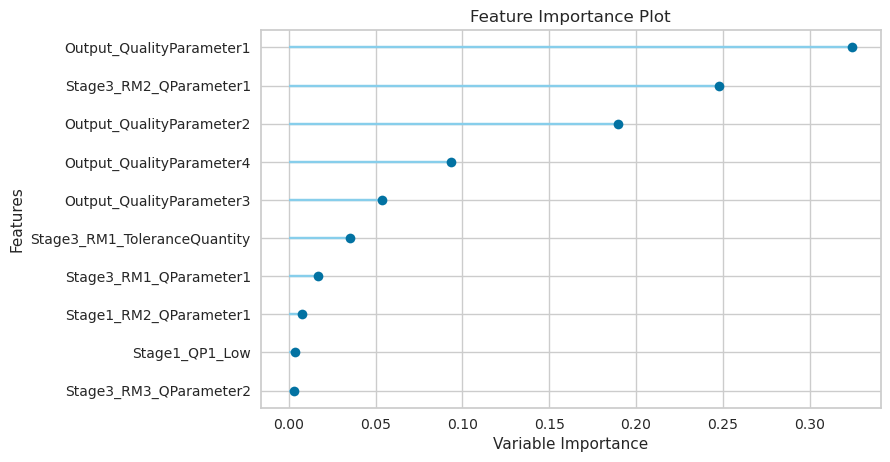

In [16]:
#Feature Importance plot of best model
plot_model(best_model, plot = 'feature')

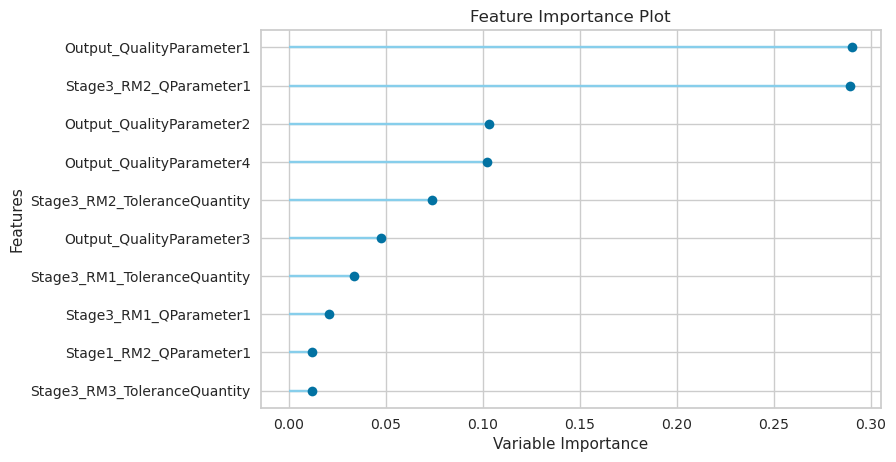

In [18]:
#Feature Importance plot of best model
plot_model(tuned_model, plot = 'feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


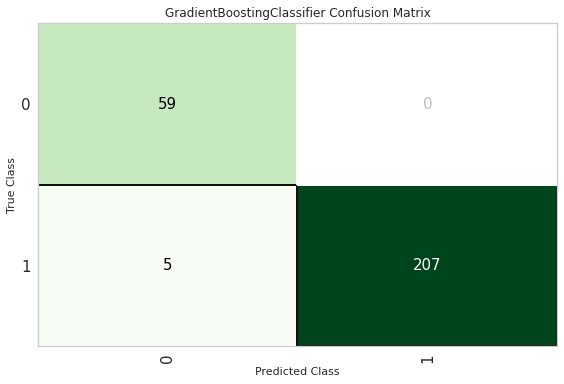

In [17]:
#Confusion matrix of the best model
plot_model(best_model, plot = 'confusion_matrix')

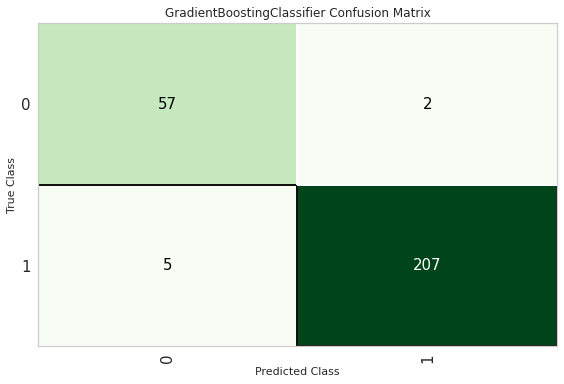

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-pa

In [19]:
#Confusion matrix of the best model
plot_model(tuned_model, plot = 'confusion_matrix')

In [20]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

##### finalize_model - Finalize the model for prediction by checking it on the validation set

In [21]:
final_model = finalize_model(best_model)

In [22]:
print(final_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=160, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


##### predict_model() - Predict on unseen/test data

In [26]:
predictions = predict_model(final_model, data=testdata)

In [28]:
predictions.head(10)

,X,Product_Qty_Unit,Product_ID,Production_Start_Time,Output_QualityParameter1,Material_ID,Product_Name,Output_QualityParameter2,Output_QualityParameter3,Output_QualityParameter4,...,Stage5_QP2_Low,Stage5_QP2_Actual,Stage5_QP2_High,Stage5_QP3_Low,Stage5_QP3_Actual,Stage5_QP3_High,Stage5_ResourceName,Detergent_Quality,Label,Score
0,2,KG,Product_0407,201026,391.082110,1234,Tide Plus Oxi,14202.98200,36257.61250,7151.50150,...,0,18.1476,18.1476,0,0.0,0,Resource_108,Good,Good,0.9991
1,8,KG,Product_0407,143614,394.579180,1234,Tide Plus Oxi,15497.74825,38806.96250,8312.20100,...,0,0.0000,19.0332,0,0.0,0,Resource_108,Good,Good,0.9812
2,21,KG,Product_0407,123559,389.127500,1234,Tide Plus Oxi,14159.22000,31130.20000,8274.60800,...,0,18.4428,18.4428,0,0.0,0,Resource_108,Good,Good,0.9994
3,27,KG,Product_0407,203623,393.134860,1234,Tide Plus Oxi,14327.80500,35718.96650,7500.73160,...,0,4.8321,19.3284,0,0.0,0,Resource_108,Good,Good,0.9995
4,57,KG,Product_0407,230058,384.468800,1234,Tide Plus Oxi,13026.41000,32376.32000,6839.49760,...,0,0.0000,18.7380,0,0.0,0,Resource_108,Good,Good,0.9995
5,67,KG,Product_0407,81913,392.870750,1234,Tide Plus Oxi,14244.73300,34065.69600,7086.88140,...,0,20.2140,20.2140,0,0.0,0,Resource_108,Good,Good,0.9994
6,82,KG,Product_0407,163917,384.938285,1234,Tide Plus Oxi,15890.78125,38519.25375,8456.43815,...,0,4.9797,19.9188,0,0.0,0,Resource_108,Good,Good,0.9751
7,86,KG,Product_0407,144306,390.345475,1234,Tide Plus Oxi,15064.18000,35879.21250,8025.74725,...,0,4.5000,18.0000,0,0.0,0,Resource_108,Good,Good,0.9992
8,112,KG,Product_0407,203843,391.730075,1234,Tide Plus Oxi,14545.67500,35486.43125,7598.86125,...,0,4.8321,19.3284,0,0.0,0,Resource_108,Good,Good,0.9995
9,118,KG,Product_0407,122456,379.666980,1234,Tide Plus Oxi,13634.86575,32643.32500,7432.63400,...,0,5.0535,20.2140,0,0.0,0,Resource_108,Good,Good,0.9996


In [29]:
from pycaret.utils import check_metric

In [39]:
metrics = ['AUC', 'Accuracy','Precision','Recall','F1','Kappa','MCC']

In [40]:
for metric in metrics:
    print(check_metric(predictions['Detergent_Quality'], predictions['Label'], metric = metric))

1.0
1.0
1.0
1.0
1.0
1.0
1.0


##### Save & Load Model

In [41]:
save_model(best_model, 'detergent-gbc-v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Detergent_Quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
           

In [43]:
model_saved = load_model('detergent-gbc-v1')

Transformation Pipeline and Model Successfully Loaded


In [44]:
predictions_saved_model = predict_model(model_saved, data=testdata)

In [46]:
predictions_saved_model.head(10)

,X,Product_Qty_Unit,Product_ID,Production_Start_Time,Output_QualityParameter1,Material_ID,Product_Name,Output_QualityParameter2,Output_QualityParameter3,Output_QualityParameter4,...,Stage5_QP2_Low,Stage5_QP2_Actual,Stage5_QP2_High,Stage5_QP3_Low,Stage5_QP3_Actual,Stage5_QP3_High,Stage5_ResourceName,Detergent_Quality,Label,Score
0,2,KG,Product_0407,201026,391.082110,1234,Tide Plus Oxi,14202.98200,36257.61250,7151.50150,...,0,18.1476,18.1476,0,0.0,0,Resource_108,Good,Good,0.9998
1,8,KG,Product_0407,143614,394.579180,1234,Tide Plus Oxi,15497.74825,38806.96250,8312.20100,...,0,0.0000,19.0332,0,0.0,0,Resource_108,Good,Good,0.9877
2,21,KG,Product_0407,123559,389.127500,1234,Tide Plus Oxi,14159.22000,31130.20000,8274.60800,...,0,18.4428,18.4428,0,0.0,0,Resource_108,Good,Good,0.9998
3,27,KG,Product_0407,203623,393.134860,1234,Tide Plus Oxi,14327.80500,35718.96650,7500.73160,...,0,4.8321,19.3284,0,0.0,0,Resource_108,Good,Good,0.9998
4,57,KG,Product_0407,230058,384.468800,1234,Tide Plus Oxi,13026.41000,32376.32000,6839.49760,...,0,0.0000,18.7380,0,0.0,0,Resource_108,Good,Good,0.9998
5,67,KG,Product_0407,81913,392.870750,1234,Tide Plus Oxi,14244.73300,34065.69600,7086.88140,...,0,20.2140,20.2140,0,0.0,0,Resource_108,Good,Good,0.9998
6,82,KG,Product_0407,163917,384.938285,1234,Tide Plus Oxi,15890.78125,38519.25375,8456.43815,...,0,4.9797,19.9188,0,0.0,0,Resource_108,Good,Good,0.9878
7,86,KG,Product_0407,144306,390.345475,1234,Tide Plus Oxi,15064.18000,35879.21250,8025.74725,...,0,4.5000,18.0000,0,0.0,0,Resource_108,Good,Good,0.9998
8,112,KG,Product_0407,203843,391.730075,1234,Tide Plus Oxi,14545.67500,35486.43125,7598.86125,...,0,4.8321,19.3284,0,0.0,0,Resource_108,Good,Good,0.9998
9,118,KG,Product_0407,122456,379.666980,1234,Tide Plus Oxi,13634.86575,32643.32500,7432.63400,...,0,5.0535,20.2140,0,0.0,0,Resource_108,Good,Good,0.9998
